In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from matplotlib import cm
import seaborn as sns
import plotly.express as px
from matplotlib.ticker import PercentFormatter
from matplotlib.ticker import FuncFormatter
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
from IPython.display import clear_output

from scipy.signal import savgol_filter

plt.rcParams['figure.figsize']=[18,12]

%config InlineBackend.figure_format = 'retina'
from sklearn.metrics import r2_score, mean_squared_error

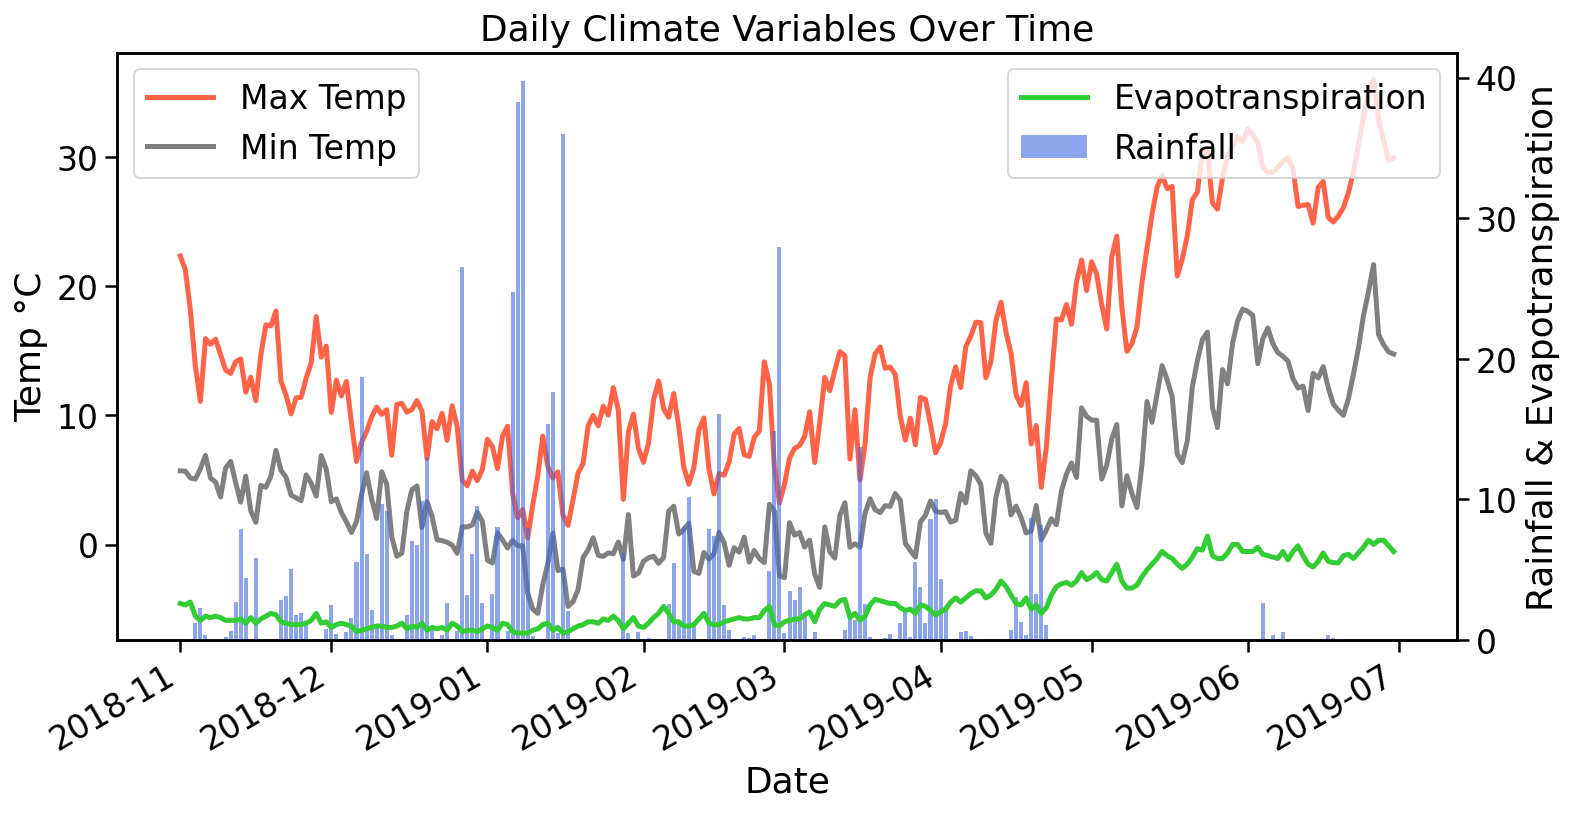

In [11]:
# define axes on the figure to take up the entire figure canvas
ax = fig.add_axes([0, 0, 1, 1])


import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('201819 daily weather data.csv')

# Assuming your dataframe has columns named "Date", "MaxTemp", "MinTemp", "Rainfall", and "Evapotranspiration"
# If not, replace these column names with the appropriate ones from your dataset.

# Convert "Date" column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Create a new figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot max and min temperatures on ax1
ax1.plot(df['Date'], df['MaxTemp'], color='tomato', label='Max Temp')
ax1.plot(df['Date'], df['MinTemp'], color='gray', label='Min Temp')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temp °C', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis object for rainfall and evapotranspiration
ax2 = ax1.twinx()
ax2.bar(df['Date'], df['Rainfall'], color='royalblue', alpha=0.6, label='Rainfall')
ax2.plot(df['Date'], df['Evapotranspiration'], color='limegreen', label='Evapotranspiration')
ax2.set_ylabel('Rainfall & Evapotranspiration', color='black')
ax2.tick_params(axis='y', labelcolor='black')

#Autodate format
plt.gcf().autofmt_xdate()

# Add legend to the plot
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.title("Daily Climate Variables Over Time")
plt.show()


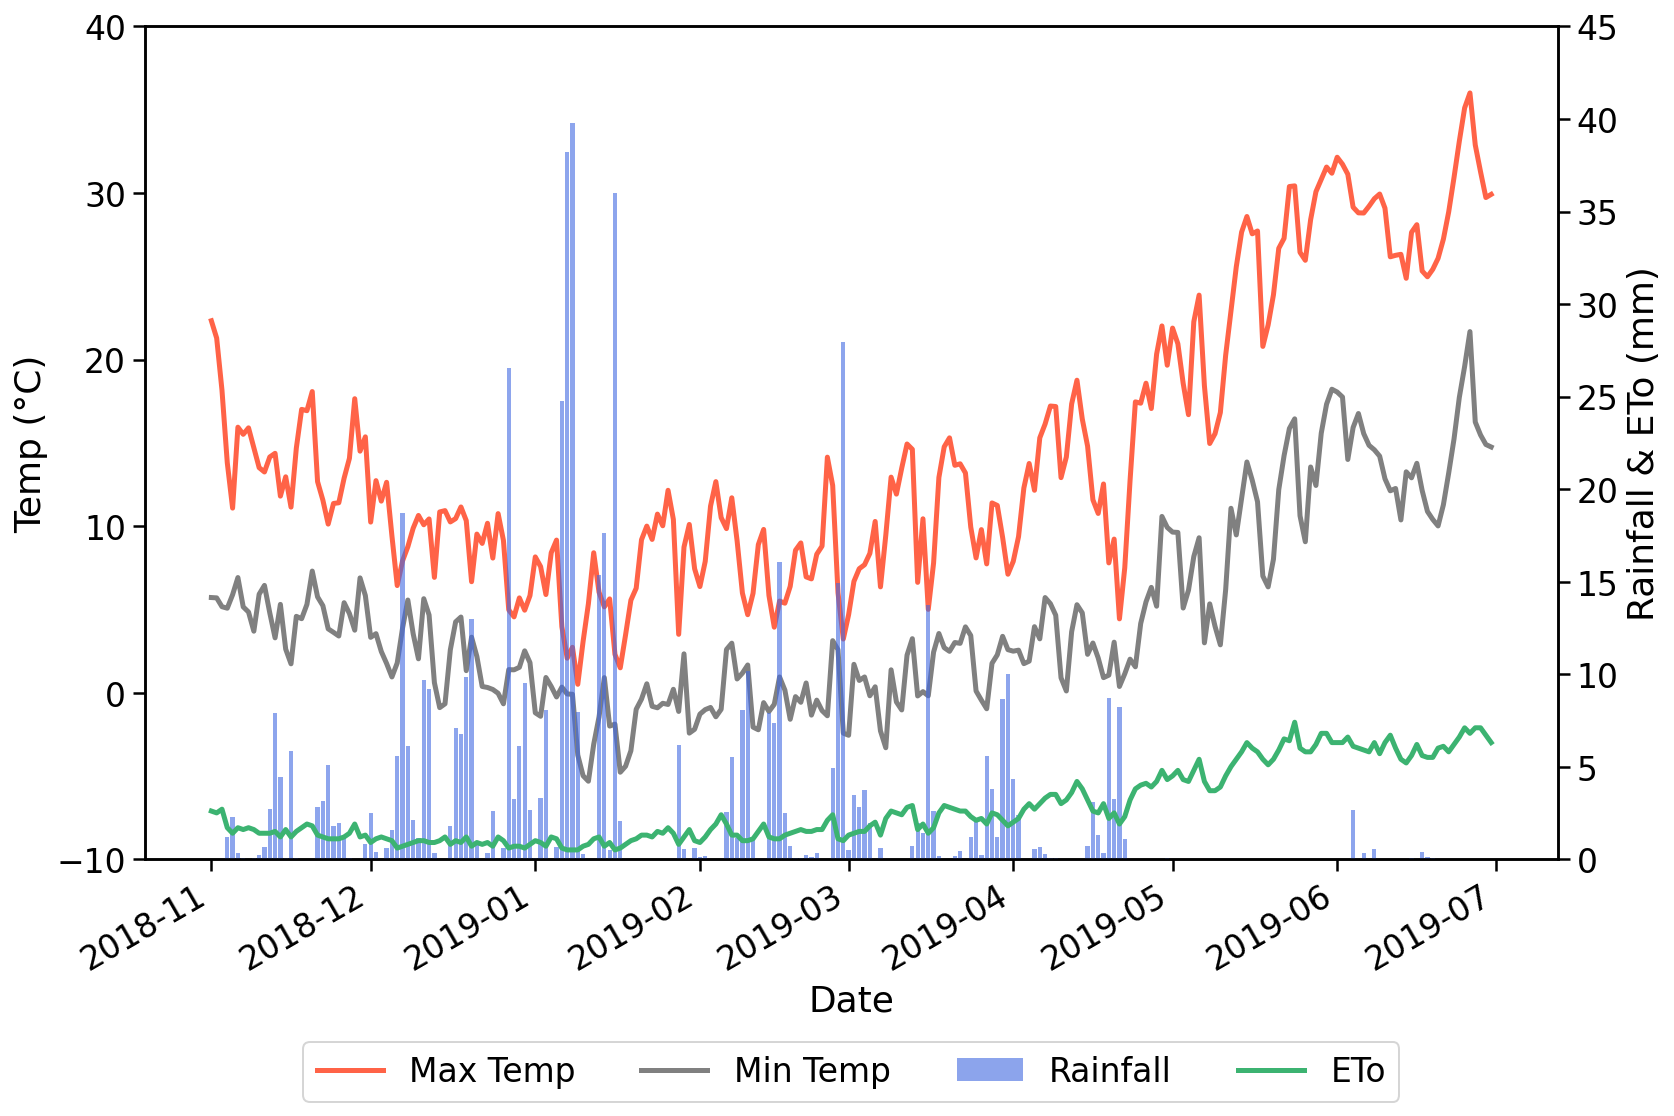

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
df = pd.read_csv('201819 daily weather data.csv')

# Convert "Date" column to datetime format for better plotting
df['Date'] = pd.to_datetime(df['Date'])

# Create a new figure and axis object
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot max and min temperatures on ax1
ln1 = ax1.plot(df['Date'], df['MaxTemp'], color='tomato', label='Max Temp')
ln2 = ax1.plot(df['Date'], df['MinTemp'], color='gray', label='Min Temp')
ax1.set_xlabel('Date')
ax1.set_ylabel('Temp (°C)', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second axis object for rainfall and evapotranspiration
ax2 = ax1.twinx()
ln3 = ax2.bar(df['Date'], df['Rainfall'], color='royalblue', alpha=0.6, label='Rainfall')
ln4 = ax2.plot(df['Date'], df['Evapotranspiration'], color='mediumseagreen', label='ETo')
ax2.set_ylabel('Rainfall & ETo (mm)', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Collect all the labels for the legend
lns = ln1 + ln2 + [ln3] + ln4
labs = [l.get_label() for l in lns]

# Place the legend under the plot, side by side
ax1.legend(lns, labs, loc='upper center', bbox_to_anchor=(0.5, -0.2), ncol=4)

#Autodate format
plt.gcf().autofmt_xdate()

# Set x-axis limits to reduce the gap before and after dates
#ax1.set_xlim(df['Date'].min(), df['Date'].max())

# Set y-axis limits for temperature
ax1.set_ylim(-10, 40)

# Set y-axis limits for rainfall & evapotranspiration
ax2.set_ylim(0, 45)

# Display the plot
#plt.title("Daily Climate Variables Over Time")
plt.tight_layout()
plt.show()
